In [1]:
import tensorflow as tf
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
input_data = tf.constant(np.loadtxt('Домашнее задание 3_вар2.txt'), dtype='float32')
input_data

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[9.1636, 6.3339],
       [8.3872, 1.6484],
       [8.9726, 2.0461],
       ...,
       [8.2343, 1.5666],
       [8.1887, 4.5177],
       [8.5591, 5.1374]], dtype=float32)>

In [3]:
class KohonenNN(tf.Module):
    def __init__(self, num_outputs):
        super().__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.W = tf.Variable(self.norm(tf.constant(tf.random.uniform([self.num_outputs, int(input_shape[-1])]))), name="kernel")
    
    def __call__(self, inputs):
        y = []
        for X in self.norm(inputs):
            y.append(tf.math.argmax(tf.math.reduce_sum(tf.math.multiply(X, self.W), axis=1)).numpy())
        return tf.constant(y)
    
    def train(self, data_train, learning_rate=0.9, max_distance=2):
        data_train = self.norm(data_train)
        delt_max_distance = max_distance/(learning_rate/0.001)
        epch = 0
        sum_corr = 0
        while(True):
            for X in data_train:
                prev_sum_corr = sum_corr
                sum_corr = 0
                ind_min_dist = tf.math.argmax(tf.math.reduce_sum(tf.math.multiply(X, self.W), axis=1))
                for i in range(self.num_outputs):
                    if tf.math.sqrt(tf.math.reduce_sum(tf.math.pow(tf.math.subtract(self.W[ind_min_dist], self.W[i]), 2))) <= max_distance:
                        corr = tf.math.multiply(tf.math.subtract(X, self.W[i]), learning_rate)
                        sum_corr += tf.abs(tf.math.reduce_sum(corr))
                        new_w = tf.math.add(self.W[i], corr)
                        self.W[i].assign(tf.math.divide(new_w, tf.math.sqrt(tf.math.reduce_sum(tf.math.pow(new_w, 2)))))
                if (learning_rate-0.001) >= 0:
                    learning_rate -= 0.001
                if (max_distance-delt_max_distance) >= 0:
                    max_distance -= delt_max_distance
                if abs(sum_corr-prev_sum_corr) < 0.0000001:
                    print('Learning rate: {}\tMax distance: {}'.format(learning_rate, max_distance))
                    return
                print('Epoch: ', epch, '\tLoss: ', abs(sum_corr-prev_sum_corr).numpy())
                epch += 1
                
    def norm(self, inp):
        denoms = tf.math.sqrt(tf.math.reduce_sum(tf.math.pow(inp, 2), axis=1, keepdims=True))
        denoms = tf.concat([denoms, denoms], 1)
        return tf.math.divide(inp, denoms)


In [4]:
knn = KohonenNN(2)
knn.build(input_data.shape)
y = knn(input_data)
y

<tf.Tensor: shape=(1000,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
    

In [5]:
knn.train(input_data)
y = knn(input_data)
y

Epoch:  0 	Loss:  0.33999503
Epoch:  1 	Loss:  0.056310654
Epoch:  2 	Loss:  0.37959623
Epoch:  3 	Loss:  0.012293267
Epoch:  4 	Loss:  0.34490302
Epoch:  5 	Loss:  0.32157445
Epoch:  6 	Loss:  0.019386485
Epoch:  7 	Loss:  0.0006132452
Epoch:  8 	Loss:  0.0008732779
Epoch:  9 	Loss:  0.058221117
Epoch:  10 	Loss:  0.15591767
Epoch:  11 	Loss:  0.1355438
Epoch:  12 	Loss:  0.044130687
Epoch:  13 	Loss:  0.24971488
Epoch:  14 	Loss:  0.2738231
Epoch:  15 	Loss:  0.36459902
Epoch:  16 	Loss:  0.052055806
Epoch:  17 	Loss:  0.0053552687
Epoch:  18 	Loss:  0.089027
Epoch:  19 	Loss:  0.18334913
Epoch:  20 	Loss:  0.05831636
Epoch:  21 	Loss:  0.3818603
Epoch:  22 	Loss:  0.13044566
Epoch:  23 	Loss:  0.24970691
Epoch:  24 	Loss:  0.23452137
Epoch:  25 	Loss:  0.0033205599
Epoch:  26 	Loss:  0.0807683
Epoch:  27 	Loss:  0.2689737
Epoch:  28 	Loss:  0.2644731
Epoch:  29 	Loss:  0.054368734
Epoch:  30 	Loss:  0.24190101
Epoch:  31 	Loss:  0.03130568
Epoch:  32 	Loss:  0.034682855
Epoch:  33 	

Epoch:  304 	Loss:  0.17184742
Epoch:  305 	Loss:  0.0611825
Epoch:  306 	Loss:  0.11617922
Epoch:  307 	Loss:  0.027531061
Epoch:  308 	Loss:  0.0040185167
Epoch:  309 	Loss:  0.026520273
Epoch:  310 	Loss:  0.020789428
Epoch:  311 	Loss:  0.020597419
Epoch:  312 	Loss:  0.011759482
Epoch:  313 	Loss:  0.018479064
Epoch:  314 	Loss:  0.21121016
Epoch:  315 	Loss:  0.090301216
Epoch:  316 	Loss:  0.026152804
Epoch:  317 	Loss:  0.08868271
Epoch:  318 	Loss:  0.0012228787
Epoch:  319 	Loss:  0.14257266
Epoch:  320 	Loss:  0.2183139
Epoch:  321 	Loss:  0.19116358
Epoch:  322 	Loss:  0.15445672
Epoch:  323 	Loss:  0.04406121
Epoch:  324 	Loss:  0.09198472
Epoch:  325 	Loss:  0.015263898
Epoch:  326 	Loss:  0.012815768
Epoch:  327 	Loss:  6.069243e-05
Epoch:  328 	Loss:  0.17853647
Epoch:  329 	Loss:  0.10304685
Epoch:  330 	Loss:  0.07053502
Epoch:  331 	Loss:  0.06681153
Epoch:  332 	Loss:  0.08417639
Epoch:  333 	Loss:  0.05075372
Epoch:  334 	Loss:  0.06295233
Epoch:  335 	Loss:  0.208

Epoch:  568 	Loss:  0.009533789
Epoch:  569 	Loss:  0.08066094
Epoch:  570 	Loss:  0.062083878
Epoch:  571 	Loss:  0.050243974
Epoch:  572 	Loss:  0.0061701387
Epoch:  573 	Loss:  0.0034404472
Epoch:  574 	Loss:  0.056499735
Epoch:  575 	Loss:  0.02202833
Epoch:  576 	Loss:  0.032381486
Epoch:  577 	Loss:  0.06241899
Epoch:  578 	Loss:  0.00028722733
Epoch:  579 	Loss:  0.043774612
Epoch:  580 	Loss:  0.032205805
Epoch:  581 	Loss:  0.030930374
Epoch:  582 	Loss:  0.014084924
Epoch:  583 	Loss:  0.04322651
Epoch:  584 	Loss:  0.0060461685
Epoch:  585 	Loss:  0.02448196
Epoch:  586 	Loss:  0.0015198365
Epoch:  587 	Loss:  0.04218139
Epoch:  588 	Loss:  0.009207383
Epoch:  589 	Loss:  0.021637361
Epoch:  590 	Loss:  0.01181528
Epoch:  591 	Loss:  0.0078251995
Epoch:  592 	Loss:  0.08583759
Epoch:  593 	Loss:  0.07959697
Epoch:  594 	Loss:  0.057702474
Epoch:  595 	Loss:  0.01884593
Epoch:  596 	Loss:  0.066564485
Epoch:  597 	Loss:  0.020412307
Epoch:  598 	Loss:  0.047273032
Epoch:  599

Epoch:  824 	Loss:  0.0032615867
Epoch:  825 	Loss:  0.0068162307
Epoch:  826 	Loss:  0.010479344
Epoch:  827 	Loss:  0.0032130405
Epoch:  828 	Loss:  0.004925417
Epoch:  829 	Loss:  0.007535044
Epoch:  830 	Loss:  0.0025445689
Epoch:  831 	Loss:  0.00048634317
Epoch:  832 	Loss:  0.0003717998
Epoch:  833 	Loss:  0.0036437307
Epoch:  834 	Loss:  0.002684676
Epoch:  835 	Loss:  8.9370646e-05
Epoch:  836 	Loss:  0.0030940017
Epoch:  837 	Loss:  0.005642581
Epoch:  838 	Loss:  0.004628338
Epoch:  839 	Loss:  0.0035284031
Epoch:  840 	Loss:  0.0034570592
Epoch:  841 	Loss:  0.00026228372
Epoch:  842 	Loss:  0.0033680685
Epoch:  843 	Loss:  0.0027161222
Epoch:  844 	Loss:  0.002171942
Epoch:  845 	Loss:  0.00012916047
Epoch:  846 	Loss:  0.001942154
Epoch:  847 	Loss:  0.0020682374
Epoch:  848 	Loss:  0.0015303986
Epoch:  849 	Loss:  0.001173595
Epoch:  850 	Loss:  0.0052133305
Epoch:  851 	Loss:  0.0062641446
Epoch:  852 	Loss:  0.004427388
Epoch:  853 	Loss:  0.0010276609
Epoch:  854 	Los

Epoch:  1083 	Loss:  5.0589813e-05
Epoch:  1084 	Loss:  5.8182617e-05
Epoch:  1085 	Loss:  3.7451166e-05
Epoch:  1086 	Loss:  1.879051e-05
Epoch:  1087 	Loss:  1.1639233e-05
Epoch:  1088 	Loss:  1.3722602e-05
Epoch:  1089 	Loss:  2.3638e-05
Epoch:  1090 	Loss:  4.8824513e-06
Epoch:  1091 	Loss:  3.4671102e-05
Epoch:  1092 	Loss:  4.1270832e-06
Epoch:  1093 	Loss:  4.138281e-06
Epoch:  1094 	Loss:  2.7686721e-05
Epoch:  1095 	Loss:  1.7802726e-05
Epoch:  1096 	Loss:  7.2748517e-06
Epoch:  1097 	Loss:  5.07839e-05
Epoch:  1098 	Loss:  3.6832032e-05
Epoch:  1099 	Loss:  3.724327e-05
Epoch:  1100 	Loss:  7.946562e-05
Epoch:  1101 	Loss:  3.6284036e-05
Epoch:  1102 	Loss:  2.247018e-05
Epoch:  1103 	Loss:  7.574858e-05
Epoch:  1104 	Loss:  9.849355e-06
Epoch:  1105 	Loss:  8.732287e-05
Epoch:  1106 	Loss:  4.149726e-05
Epoch:  1107 	Loss:  1.8542582e-05
Epoch:  1108 	Loss:  4.4132255e-05
Epoch:  1109 	Loss:  5.2555675e-05
Epoch:  1110 	Loss:  2.410695e-05
Epoch:  1111 	Loss:  5.055881e-05
E

<tf.Tensor: shape=(1000,), dtype=int32, numpy=
array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
    

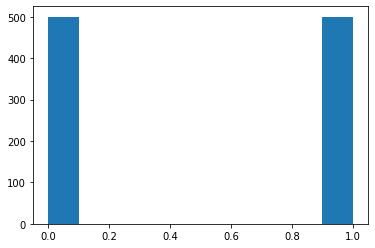

Мощность первого класса:  500 	Мощность второго класса:  500


In [6]:
n = plt.hist(y.numpy(), )
plt.show()
print('Мощность первого класса: ', int(n[0][0]), '\tМощность второго класса: ',  int(n[0][-1]))

In [7]:
# Средний коэффициент силуэта для евклидова расстояния
metrics.silhouette_score(input_data, y, metric='euclidean')

0.7015748

In [8]:
# Средний коэффициент силуэта для косинусного сходства
metrics.silhouette_score(input_data, y, metric='cosine')

0.9642009

In [10]:
# Индекс Дэвиса-Болдина
metrics.davies_bouldin_score(input_data, y)

0.4400800708653689